## Introduction

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


So, our today's analysis would be related to detection of any fradulent bank transactions happening in case of a top ranked bank. Since details are of private nature, we won't have informatioon about these details. Rather we would be dealing with pca of these datasets. Please refer the following [link](https://www.kaggle.com/mlg-ulb/creditcardfraud)


It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



## Step1 : Loading and importing data

We will load and import the required libraries

In [65]:
# importing modules
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
# setting style
sns.set_style('darkgrid')
# display only 2 digits float 
pd.options.display.float_format = '{:.3f}'.format
import warnings
# using filterwarnings to get rid of unnecesaary warnings
warnings.filterwarnings('ignore')

In [66]:
# importing dataset
df = pd.read_csv(r'C:/Users/Rishabh Gupta/Downloads/creditcard_file.csv')

## Step2 : Data Exploration

This step is all about exploring the data so as to deliver some useful insights about the dataset. It would be highly informative when we start modelling of the dataset.

In [67]:
#  look at the first few and last rows
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.000,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,...,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.770,0
284803,172787.000,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,...,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.790,0
284804,172788.000,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,...,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.880,0
284805,172788.000,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,...,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.000,0


It seems that apart from time and amount , all other features seems to be standardized.

In [68]:
# number of rows and columns
print("There are {} transactions and {} number of columns.".format(df.shape[0],df.shape[1]))

There are 284807 transactions and 31 number of columns.


In [69]:
# look at the null and data type using info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

All variables are of float datatype except class . There appears to be lack of null values in the dataset.

In [70]:
# describe data set
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,...,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,...,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,...,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,...,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,...,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


1. For Pca features, values lie between 0 and 1 for larger percentage of data (most of 75 percent).
2. On average , the transaction amount is around 88.
3. Mean is quite higher than median  (88>8). It implies that the distribution of data is highly skewed toward right with many large value lying on the right side.



Text(0.5, 1.0, 'The distribution of transaction amount')

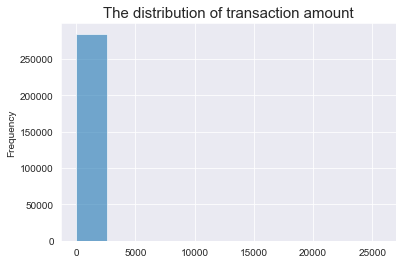

In [71]:
# distribution of Amout varible
df['Amount'].plot.hist(alpha=0.6)
# title
plt.title("The distribution of transaction amount",fontsize=15)

The most of the transactions amout lie in the 0-2500 bandwidth.

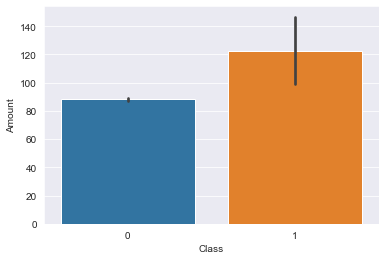

In [72]:
# barplot
sns.barplot(x='Class',y='Amount',data=df)

On average, the fraud transactions are of higher amount than that of geniune ones. Also, there is a lot of deviation in the amount for the fraud transactions (while there is so less margin for geniune ones).

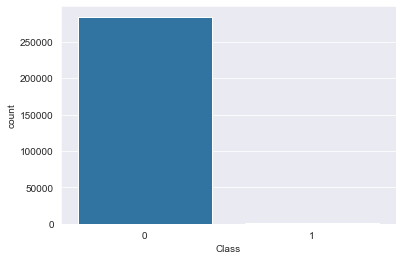

In [73]:
# distribution of fraud
sns.countplot(df['Class'])

In [74]:
fraud_geniune = df.groupby('Class')['Amount'].count()
# number of each transctions
print("There are {} percentage of geniune transactions".format(fraud_geniune[0]*100 /len(df)))
print("There are {} percentage of fraud transactions".format(fraud_geniune[1]*100/len(df)))

There are 99.827251436938 percentage of geniune transactions
There are 0.1727485630620034 percentage of fraud transactions


Since class has mostly geniune and hardly any fraud ones (which is obvious in general cases) , the above is case of imbalanced dataset. It implies that there is a case of imbalanced dataset. 

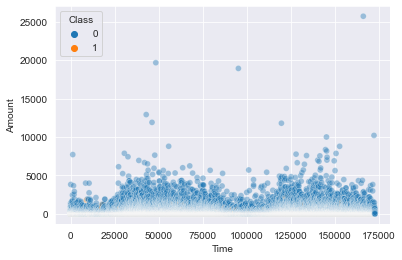

In [75]:
# link between amount and time with respect to class
sns.scatterplot(x=df['Time'],y=df['Amount'],hue=df['Class'],alpha=0.4,sizes=(20, 200))

There appears to be lack of correlation between amount and time.

In [76]:
# getting a variable for index
index_for_time = range(0,len(df))
df['index'] = timing

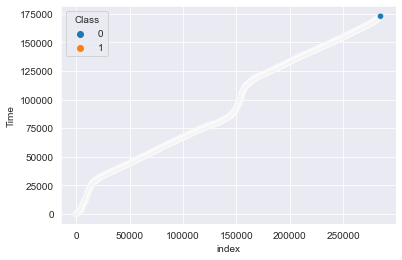

In [77]:
# look at the time and index with respect to class
sns.scatterplot(df['index'],df['Time'],hue=df['Class'])

The above graph is quite tidy. This suggests that fraud seems to occuring irespective of time variable. So, it may seem logical to remove this variable from the further model and analysis.

In [78]:
# all columns list except Class
col  = list(df.columns)
col.remove('Class')

# group by
df.groupby('Class')[col].mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,index
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202,0.008,-0.006,0.012,-0.008,0.005,0.002,0.010,-0.001,0.004,...,-0.001,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,88.291,142442.988
1,80746.807,-4.772,3.624,-7.033,4.542,-3.151,-1.398,-5.569,0.571,-2.581,...,0.714,0.014,-0.040,-0.105,0.041,0.052,0.171,0.076,122.211,119295.059


The mean of most of the features class 1 seems to be higher than that of class 0.

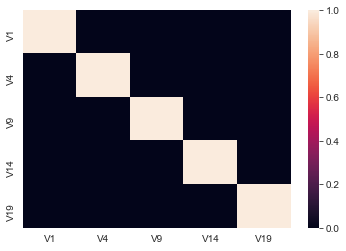

In [79]:
# let us take any 5 random V's and see how they are related
pca_f = ['V1','V4','V9','V14','V19']
# getting correlation
corr = df[pca_f].corr()
# visualize it with heatmap
sns.heatmap(corr)

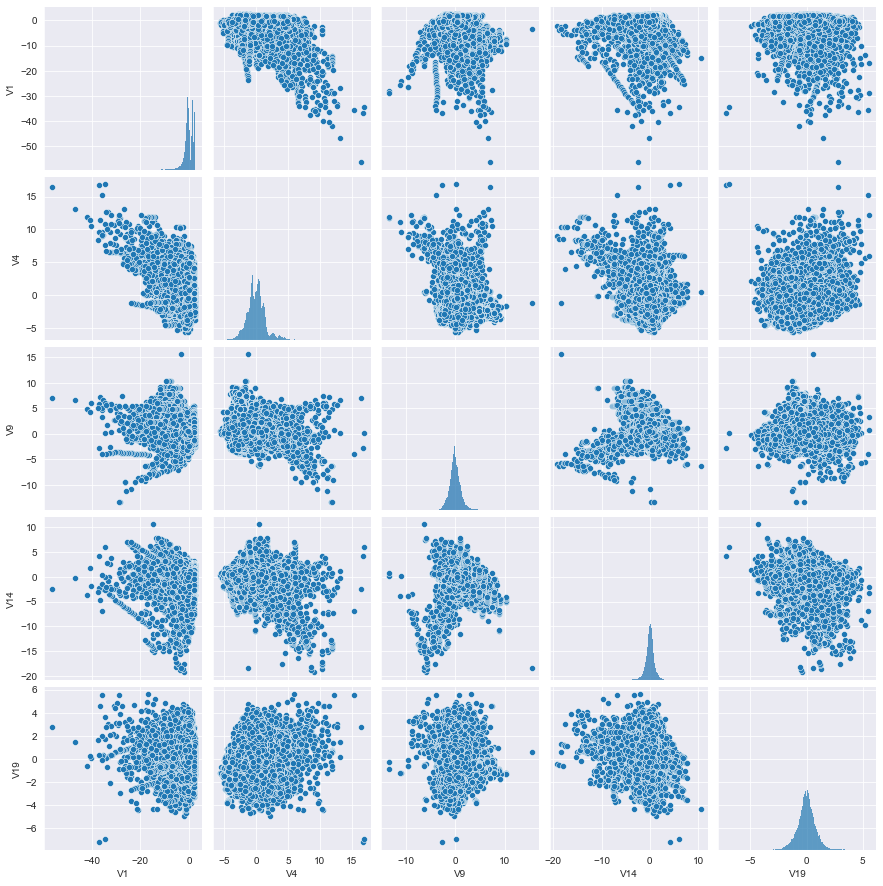

In [80]:
# look at the scatter plot using pairplot method
sns.pairplot(df[pca_f])

The above visuals and graphs shows that there is no link between any two principal components. This is thanks to the process followed while computing principal components. In this process , we first remove correlated features and then use linear transformation to get uncorrelated features.

{'whiskers': [<matplotlib.lines.Line2D at 0x20efca09550>,
 'caps': [<matplotlib.lines.Line2D at 0x20efca18250>,
 'boxes': [<matplotlib.lines.Line2D at 0x20efc9fa790>],
 'medians': [<matplotlib.lines.Line2D at 0x20efca27d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x20efca37d00>],
 'means': []}

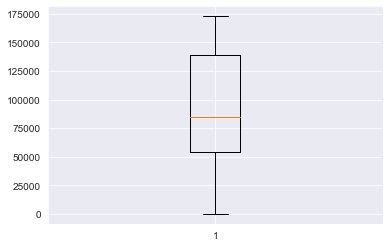

In [81]:
# look atthe time feature
plt.boxplot(df['Time'])

In [82]:
# lookat its unique values
print("There are {} number of unique values in the time feature".format(df['Time'].nunique()))

There are 124592 number of unique values in the time feature


(array([10510., 16955., 38526., 38550., 40243., 10145., 17161., 38951.,
        40779., 32987.]),
 array([     0. ,  17279.2,  34558.4,  51837.6,  69116.8,  86396. ,
        103675.2, 120954.4, 138233.6, 155512.8, 172792. ]),
 <a list of 10 Patch objects>)

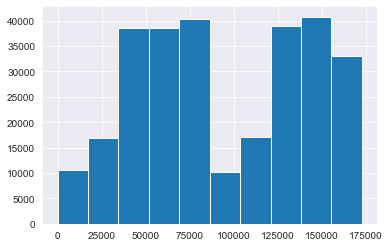

In [83]:
# look at the barplot
plt.hist(df['Time'])

In [84]:
# getting a variable for index
index_for_time = range(0,len(df))
df['index'] = timing

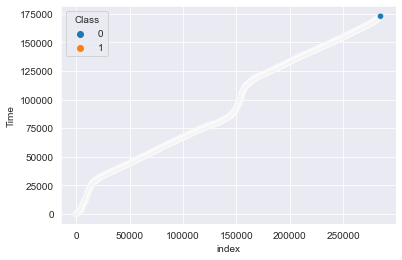

In [85]:
# look at the time and index with respect to class
sns.scatterplot(df['index'],df['Time'],hue=df['Class'])

There are quite a number of unique values (50 %) in time function. There appears to be two peaks of data. So, what would be good to have a number of quartiles ( about 10 ).However , time seems to have a very high level of variance and also it increases with time as well ( look at the df). So for now, we would drop this from the analysis . We may add time variable in future if it can help any one.

## Step  3: Data Scaling and Preparation

In this step, we will scale the dataset into the desired form so as to make it ready and clean for the modelling purpose

In [86]:
# copy the df : to keep df unchanged
df_c = df.copy()

In [87]:
# dropping the time variable
df_c.drop('Time',axis=1,inplace=True)

In [88]:
# standardize the amount variable
# f
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_c['Amount'] = ss.fit_transform(np.array(df_c['Amount']).reshape(-1,1))

As we know this set is highly biased. It would be better to create new samples of the dataset. Since there are very less instances of class1  (fraud). We would upsample the dataset of it up to the samples of class 0.

In [89]:
# first divide into min and maj dataset
df_maj =df_c[df_c['Class'] ==0]
df_min =df_c[df_c['Class'] ==1]
# using resample method of sklearn utils
from sklearn.utils import resample
df_upsample_min = resample(df_min,n_samples = len(df_maj))
# concatting them to get the required dataset
df_b = pd.concat([df_upsample_min,df_maj])

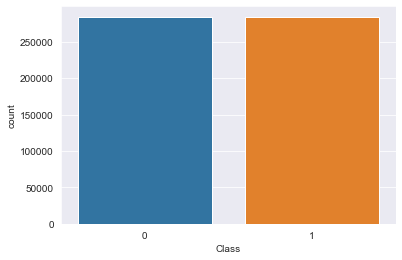

In [90]:
# look at the counts of each data
sns.countplot(df_b['Class'])

Now, thanks to this replacement , we are able to get a balanced dataset having equal percentage of each class.

In [91]:
# defining  X and y variables
X = df_b.drop('Class',axis=1)
y = np.array(df_b['Class']).reshape(-1,1)
# importing train_test_split for this
from sklearn.model_selection import train_test_split
# creating train and test : with fixed sample and test_size of 25 percent
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4,test_size=0.25)

## Step 4 Modelling

This step is concerned with the preparation of the model to be used to predict the actual nature of a banking transaction. For the given dataset, we will make use of one [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) mainly for two main reasons:

1. It is usually optimal for binary class( two values)

2. It is simple and has a better intrepretation power.

In [92]:
# using cross validation technique to get the 
from sklearn.model_selection import cross_val_score
# import logistic regresssion
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
# cross_val_score

score = cross_val_score(model,X_train,y_train,scoring='accuracy',cv=5)

In [93]:
# getting std and mean values
print("The average score of the logistic regression is {}".format(np.mean(score)))
print("The standard deviation of the model is {}".format(np.std(score)))

The average score of the logistic regression is 0.9319650672357866
The standard deviation of the model is 0.01138195038254734


If you look at the above prediction, you will find that the logistic regression is able to achieve the accuracy of 95 and there seems to lack of variation in its prediction power on any change of tes data.

In [94]:
# initialize it
lr = LogisticRegression()
# fitting the model0
lr.fit(X_train,y_train)

LogisticRegression()

In [95]:
# makin prediction for the test data
y_pred = lr.predict(X_test)
# score measure
lr.score(X_test,y_test)

0.9366760927981541

In [96]:
# look at the classification report
from sklearn.metrics import classification_report
# print the results
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     73913
           1       0.92      0.96      0.94     68245

    accuracy                           0.94    142158
   macro avg       0.94      0.94      0.94    142158
weighted avg       0.94      0.94      0.94    142158



If you look at the above, you will find the model accuracy seems to be good for all class. Also, the recall and fi_score seems to be good enough suggesting that the model is a sound one.  Since our aim is to predict most of the actual number of fraud , we would be focussing on recall metric than that of precision of 1 (fraud occurance).

In the given model , we are able to get a recall value of 98 percent which implies that the model detects 98 % of total actual frauds. This suggests that the model has a very high recall value which makes it sound like a great model.

#####  Drawing Roc_auc_curve

It is a curve that is used to compare true negative with true positive. In other words, it is a comparison of specificity (also called true negative rate) and sensitivity(true positive rate) based on a number of thresholds.  

In [97]:
# model proba
y_prob = proba = lr.predict_proba(X_test)

In [98]:
y_prob
# reshaping them and keeping only for positive one
y_prob =y_prob[:,1]

In [99]:
# importing roc_curve from sklearn
from sklearn.metrics import roc_curve
# use this to get true positive rate , negative rate and threshold
rpf,rnf,threshold =  roc_curve(y_test,y_prob,pos_label=1)

In [100]:
# look at the rpf 
rpf

array([0.00000000e+00, 1.12830205e-04, 1.12830205e-04, 1.12830205e-04,
       1.12830205e-04, 1.12830205e-04, 1.26933980e-04, 1.26933980e-04,
       1.26933980e-04, 1.26933980e-04, 1.26933980e-04, 1.26933980e-04,
       1.26933980e-04, 1.26933980e-04, 1.26933980e-04, 1.26933980e-04,
       1.26933980e-04, 1.55141531e-04, 1.55141531e-04, 1.55141531e-04,
       1.55141531e-04, 1.55141531e-04, 1.55141531e-04, 1.55141531e-04,
       1.55141531e-04, 1.55141531e-04, 1.55141531e-04, 1.55141531e-04,
       1.55141531e-04, 1.55141531e-04, 1.55141531e-04, 1.55141531e-04,
       1.55141531e-04, 1.55141531e-04, 1.55141531e-04, 1.55141531e-04,
       1.55141531e-04, 1.55141531e-04, 1.55141531e-04, 1.55141531e-04,
       1.55141531e-04, 1.55141531e-04, 1.55141531e-04, 1.69245307e-04,
       1.69245307e-04, 1.69245307e-04, 1.69245307e-04, 1.69245307e-04,
       1.83349083e-04, 1.83349083e-04, 1.83349083e-04, 1.83349083e-04,
       1.83349083e-04, 1.83349083e-04, 1.83349083e-04, 1.83349083e-04,
      

In [101]:
# look at the rnf
rnf

array([0.        , 0.19114448, 0.19912989, 0.20326995, 0.20524875,
       0.20711529, 0.20711529, 0.2091362 , 0.21132552, 0.21561996,
       0.21759876, 0.21978809, 0.22385797, 0.22593502, 0.22782963,
       0.23008912, 0.23208196, 0.23208196, 0.2339906 , 0.23591327,
       0.23980072, 0.24415129, 0.24632657, 0.24843169, 0.25046663,
       0.25244544, 0.25463476, 0.25664164, 0.25862045, 0.26057119,
       0.2626763 , 0.26451477, 0.26638131, 0.26831801, 0.27052137,
       0.27255631, 0.27460529, 0.27692092, 0.27916637, 0.28115922,
       0.28308189, 0.28496246, 0.2869974 , 0.2869974 , 0.28917269,
       0.29106729, 0.2930461 , 0.29501088, 0.29501088, 0.29713003,
       0.30997123, 0.31195004, 0.3137043 , 0.31568311, 0.3173672 ,
       0.31964073, 0.31964073, 0.32131079, 0.32309312, 0.3251421 ,
       0.32714897, 0.32872079, 0.32872079, 0.33098028, 0.33098028,
       0.33276261, 0.33467125, 0.3367904 , 0.33867097, 0.34060768,
       0.34244614, 0.34443899, 0.34664234, 0.34900007, 0.35088

In [102]:
# look at the threshold
threshold

array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

In [103]:
threshold.shape

(495,)

Text(0, 0.5, 'True Negative')

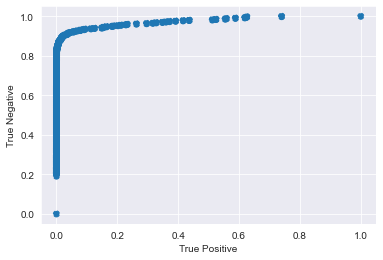

In [105]:
# plotting them
plt.scatter(rpf,rnf,linestyle='--')
plt.xlabel("True Positive")
plt.ylabel("True Negative")

From the above graph , we are able to get a very high true positive and true negative rates at a particular threshold. It resonates a great model to work with.

In [109]:
# roc_auc_cscore
from sklearn.metrics import roc_auc_score
# gettig the score
score = roc_auc_score(y_test,y_pred)
# now we will compare the result with significance level of 0.05 ( which is often desirable for the model)
if score > 0.5:
    print("score is: ",score,"Since the given roc score is greater than the significant level, our model is a good one")
else:
    print("score is: ",score,'/n',"The given score implies that it is not a good enough model to use")

score is:  0.9367281332615449 Since the given roc score is greater than the significant level, our model is a good one


# Conclusion:


Based on the above analysis, we are able to find out out that the logistic regression is able to produce an accuracy of more than 95 percent in predicting both fraud and geniune transactions. Not only this, the model excels extremely well in case of metrics such as recall and roc_auc_score. This implies that the model fares well on the overall manner. 


Although we could have gone far to advanced models like random forest and so on, but logistic model itself not only a simple nature , but also yields a nice overall performance.